In [23]:
import numpy as np 
import pandas as pd

whisky = pd.read_csv("whiskies.txt")
whisky["Region"] = pd.read_csv("regions.txt")
whisky.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,regions
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [47]:
print(whisky.iloc[5:10, 0:5])
print(whisky.columns)
flavors = whisky.iloc[:, 2:14]
flavors


   RowID    Distillery  Body  Sweetness  Smoky
5      6   ArranIsleOf     2          3      1
6      7  Auchentoshan     0          2      0
7      8     Auchroisk     2          3      1
8      9      Aultmore     2          2      1
9     10      Balblair     2          3      2
Index(['RowID', 'Distillery', 'Body', 'Sweetness', 'Smoky', 'Medicinal',
       'Tobacco', 'Honey', 'Spicy', 'Winey', 'Nutty', 'Malty', 'Fruity',
       'Floral', 'Postcode', ' Latitude', ' Longitude', 'regions'],
      dtype='object')


,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
81,1,1,1,0,0,1,0,0,1,2,2,2
82,2,3,2,0,0,2,2,1,1,2,0,1
83,0,3,1,0,0,2,2,1,1,2,1,2
84,2,2,1,0,0,1,0,1,2,1,0,0


               Body  Sweetness     Smoky  Medicinal   Tobacco     Honey  \
Body       1.000000  -0.136518  0.524032   0.354050  0.168718  0.082031   
Sweetness -0.136518   1.000000 -0.405897  -0.392017 -0.147871  0.132558   
Smoky      0.524032  -0.405897  1.000000   0.686071  0.365501 -0.195318   
Medicinal  0.354050  -0.392017  0.686071   1.000000  0.425106 -0.396629   
Tobacco    0.168718  -0.147871  0.365501   0.425106  1.000000 -0.275490   
Honey      0.082031   0.132558 -0.195318  -0.396629 -0.275490  1.000000   
Spicy      0.188500  -0.054200  0.231745   0.044903  0.054068  0.139563   
Winey      0.408576   0.115727 -0.028190  -0.202651  0.009097  0.362021   
Nutty      0.126323  -0.032493 -0.023132  -0.113671 -0.117717  0.188492   
Malty     -0.116859  -0.001516 -0.192875  -0.258959 -0.059347  0.310184   
Fruity    -0.013205   0.019820 -0.312970  -0.330975 -0.235145  0.108822   
Floral    -0.461203   0.144987 -0.431663  -0.511323 -0.212375  0.183029   

              Spicy     

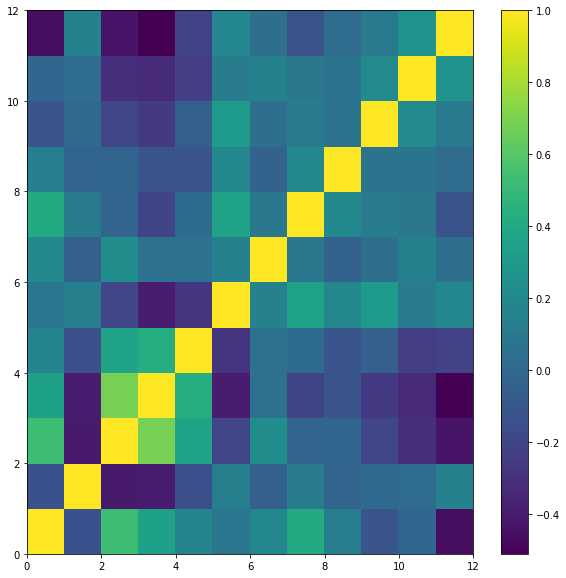

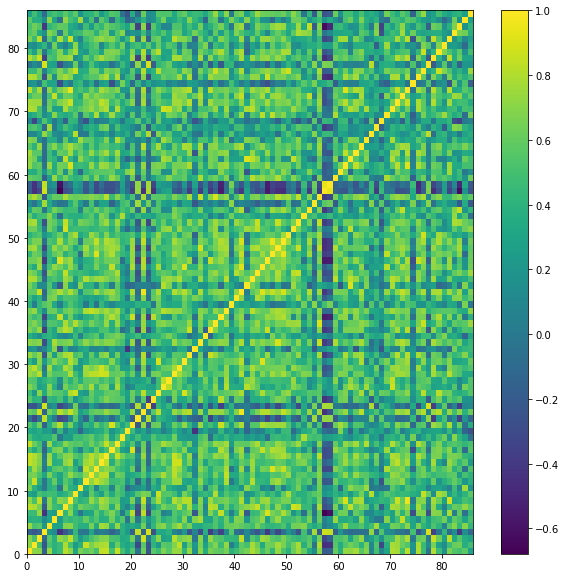

In [48]:
corr_flavors = pd.DataFrame.corr(flavors) #pairwise correlation of all columnsin dataframe
print(corr_flavors )

import matplotlib.pyplot as plt
plt.figure(figsize= (10,10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.savefig("corr_flavors.pdf")

corr_whisky = pd.DataFrame.corr(flavors.transpose())
import matplotlib.pyplot as plt
plt.figure(figsize= (10,10))
plt.pcolor(corr_whisky)
plt.axis("tight")
plt.colorbar()
plt.savefig("corr_whisky.pdf")


In [72]:
#spectral co clusterting
from sklearn.cluster.bicluster import SpectralCoclustering 

model = SpectralCoclustering( n_clusters = 6, random_state =0)
model.fit(corr_whisky)

np.sum(model.rows_, axis =1)

array([ 5, 20, 19,  6, 19, 17])

In [73]:
np.sum(model.rows_, axis =0)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [74]:
model.row_labels_

array([2, 4, 5, 3, 2, 1, 5, 4, 2, 5, 4, 1, 2, 1, 2, 2, 1, 2, 1, 0, 5, 3,
       5, 3, 5, 5, 4, 4, 5, 4, 5, 2, 1, 1, 1, 2, 4, 5, 1, 0, 1, 5, 4, 4,
       4, 1, 2, 1, 1, 5, 5, 4, 4, 4, 1, 0, 2, 3, 3, 1, 5, 2, 4, 2, 2, 4,
       0, 2, 0, 1, 4, 2, 1, 2, 4, 2, 5, 3, 2, 5, 1, 5, 4, 1, 4, 1])

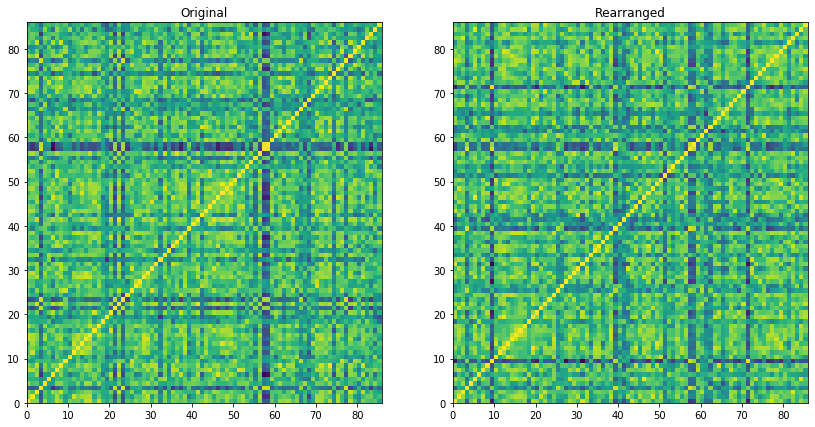

In [75]:
whisky['Group'] = pd.Series(model.row_labels_, index = whisky.index)
whisky = whisky.iloc[np.argsort(model.row_labels_)]
whisky = whisky.reset_index(drop=True)
correlations= pd.DataFrame.corr(whisky.iloc[:,2:14].transpose())
correlations = np.array(correlations)

plt.figure(figsize= (14,7))
plt.subplot(121)
plt.pcolor(corr_whisky)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.savefig("correlations.pdf")